In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
import re

# Load the dataset
df = pd.read_csv('reviews.csv')
print(df.head())

   Unnamed: 0  index         Date  \
0           0      0  1st June 23   
1           1      1  31st May 23   
2           2      2  20th May 23   
3           3      3  20th May 23   
4           4      4  19th May 23   

                                                text  score  campus  clubs  \
0                    I like my university very much!    5.0       5      5   
1  I am from the USA, so I am comparing my experi...    3.4       3      3   
2  Exeter University is generally a lovely place ...    4.0       5      4   
3  Nice facilities and some great lecturers! The ...    4.4       4      4   
4  The uni is good they provide me with alot of s...    4.8       5      5   

   cs  wifi  
0   5     5  
1   3     5  
2   4     3  
3   4     5  
4   5     5  


In [ ]:
def clean_text(text):
    text = str(text).lower() # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove punctuation and numbers
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

In [ ]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

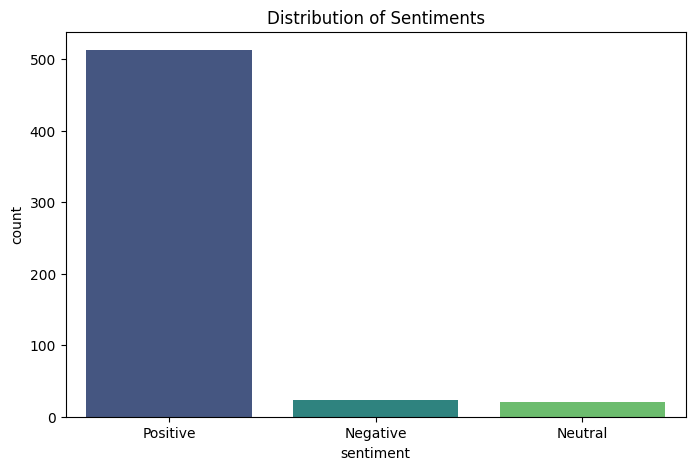

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette='viridis', hue='sentiment', legend=False)
plt.title('Distribution of Sentiments')
plt.show()

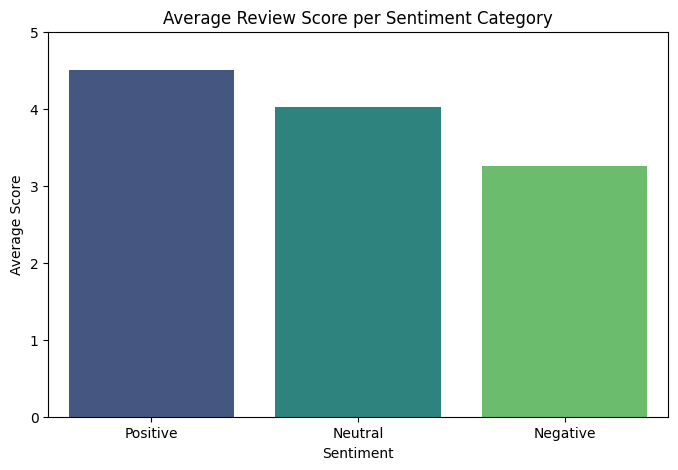

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='viridis', hue=avg_scores.index, legend=False)
plt.title('Average Review Score per Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.ylim(0, 5) # Assuming scores are between 0 and 5
plt.show()

In [ ]:
avg_scores = df.groupby('sentiment')['score'].mean()
print("Average Review Score per Sentiment Category:")
print(avg_scores)

Average Review Score per Sentiment Category:
sentiment
Negative    3.408333
Neutral     4.280000
Positive    4.483041
Name: score, dtype: float64


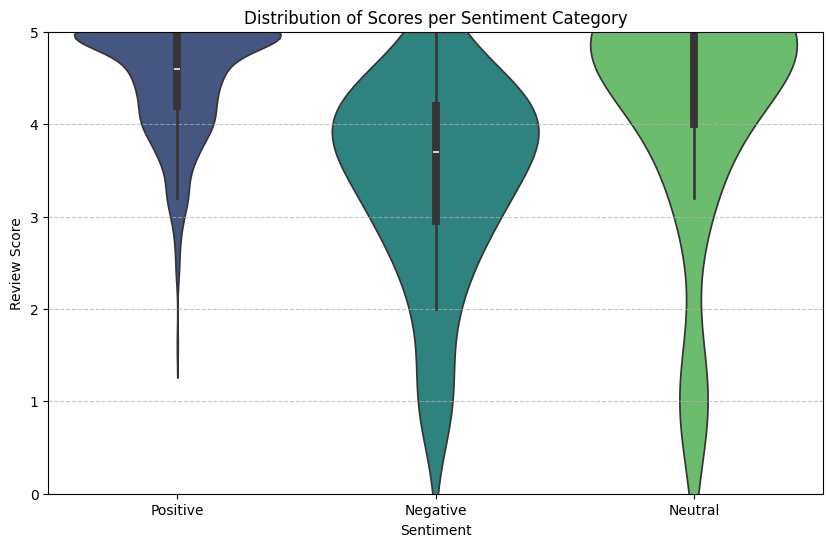

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='sentiment', y='score', palette='viridis', hue='sentiment', legend=False)
plt.title('Distribution of Scores per Sentiment Category')
plt.xlabel('Sentiment')
plt.ylabel('Review Score')
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-3309289982.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='viridis',
/tmp/ipython-input-3309289982.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='magma', ax=axes[1])


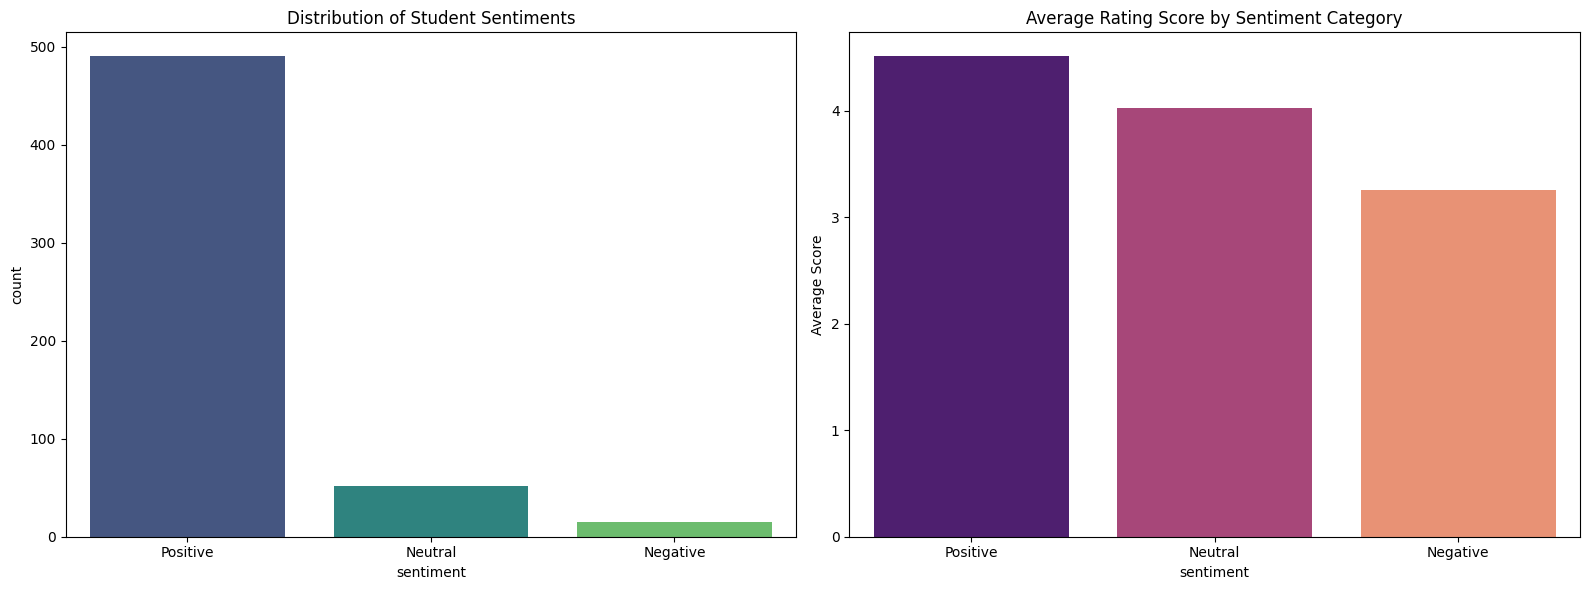

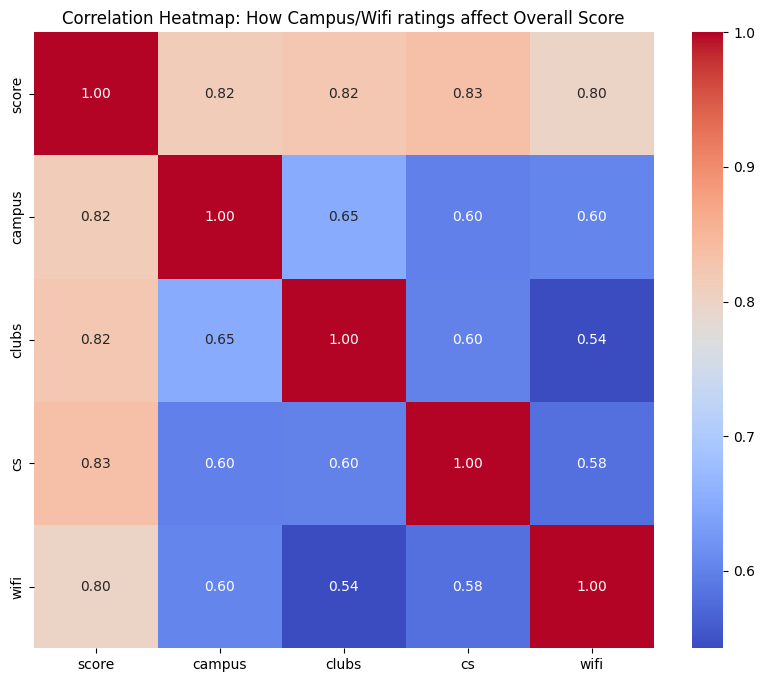

In [ ]:
# 1. Clean the text (Removing special characters for better NLP results)
def clean_text(text):
    if pd.isna(text): return ""
    text = re.sub(r'[^a-zA-Z\s]', '', str(text).lower())
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

# 2. Sentiment Analysis using TextBlob
# Polarity > 0 is Positive, < 0 is Negative, 0 is Neutral
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# 3. Visualization using Seaborn (Charting)
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Distribution of Sentiments
sns.countplot(data=df, x='sentiment', palette='viridis',
              order=['Positive', 'Neutral', 'Negative'], ax=axes[0])
axes[0].set_title('Distribution of Student Sentiments')

# Chart 2: Average Score vs Sentiment
avg_scores = df.groupby('sentiment')['score'].mean().reindex(['Positive', 'Neutral', 'Negative'])
sns.barplot(x=avg_scores.index, y=avg_scores.values, palette='magma', ax=axes[1])
axes[1].set_title('Average Rating Score by Sentiment Category')
axes[1].set_ylabel('Average Score')

plt.tight_layout()
plt.show()

# 4. Insight: Correlation Heatmap (Analyzing satisfaction trends)
plt.figure(figsize=(10, 8))
correlation = df[['score', 'campus', 'clubs', 'cs', 'wifi']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: How Campus/Wifi ratings affect Overall Score')
plt.show()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/tmp/ipython-input-252299490.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='sentiment_type', y='score', palette='coolwarm', inner="quart")


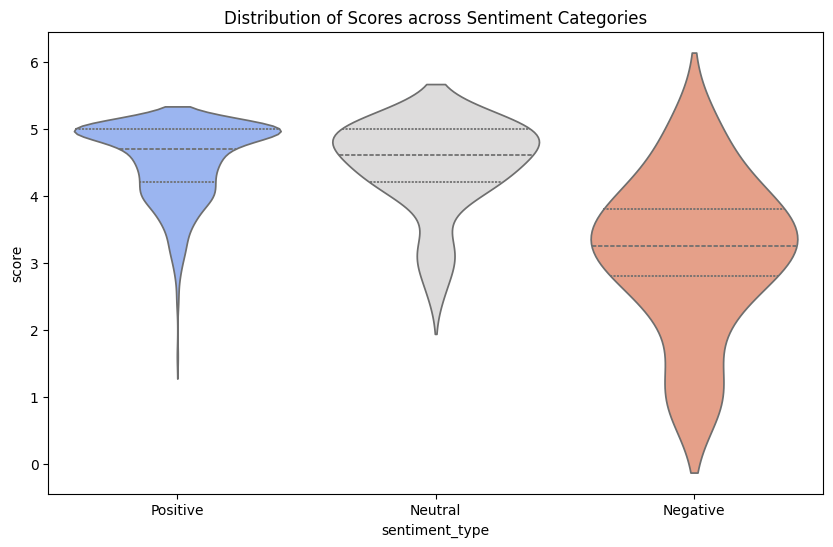

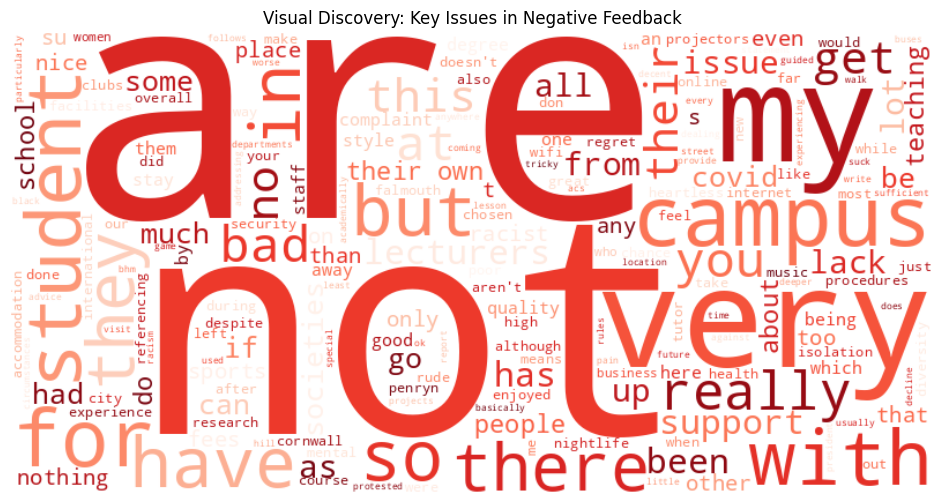

--- Actionable Insights for Improvements ---
                                                  text  score
357  Everything is alright. Although the WiFi is no...    4.0
459  Uni Wifi is painfully temperamental, can take ...    4.2
538  This uni will leech your money by any means po...    3.3


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import re

# Download the smarter sentiment tool
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# 1. Advanced Sentiment Scoring
def get_vader_score(text):
    if pd.isna(text): return 0
    return sid.polarity_scores(str(text))['compound']

df['sentiment_score'] = df['text'].apply(get_vader_score)

# Categorize based on VADER's recommended thresholds
df['sentiment_type'] = df['sentiment_score'].apply(
    lambda c: 'Positive' if c >= 0.05 else ('Negative' if c <= -0.05 else 'Neutral')
)

# 2. INNOVATIVE VISUAL 1: Violin Plot (Shows the distribution of ratings)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='sentiment_type', y='score', palette='coolwarm', inner="quart")
plt.title('Distribution of Scores across Sentiment Categories')
plt.show()

# 3. INNOVATIVE VISUAL 2: Word Cloud of "Improvements Needed"
# This extracts what students in the 'Negative' category are actually talking about
negative_text = " ".join(df[df['sentiment_type'] == 'Negative']['text'].astype(str).str.lower())
# Remove boring words
stop_words = ["the", "and", "was", "to", "uni", "university", "exeter", "i", "it", "of", "a", "is"]

cloud = WordCloud(width=800, height=400, background_color='white',
                  stopwords=stop_words, colormap='Reds').generate(negative_text)

plt.figure(figsize=(12, 6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Visual Discovery: Key Issues in Negative Feedback')
plt.show()

# 4. INNOVATIVE DATA TABLE: Top 3 Specific Complaints
print("--- Actionable Insights for Improvements ---")
# Filter reviews that mention 'wifi' or 'money' and are negative
improvements = df[(df['sentiment_type'] == 'Negative') &
                  (df['text'].str.contains('wifi|money|expensive|slow', case=False))]
print(improvements[['text', 'score']].head(3))

Average Ratings within Negative Reviews (Lower means higher priority for fix):
wifi      3.266667
cs        3.400000
clubs     3.466667
campus    3.533333
dtype: float64


/tmp/ipython-input-2486022110.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pain_points.values, y=pain_points.index, palette='Reds_r')


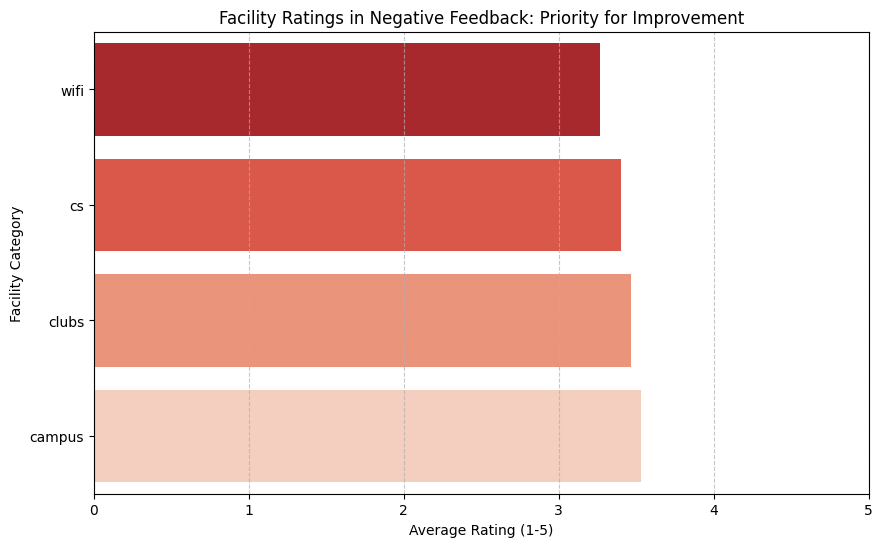

In [ ]:
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Categorize data by sentiment
df['sentiment'] = df['text'].apply(lambda x: 'Negative' if TextBlob(str(x)).sentiment.polarity < -0.1 else 'Other')

# 2. Focus only on negative feedback to find "Pain Points"
negative_feedback = df[df['sentiment'] == 'Negative']

# 3. Calculate the average ratings for each facility within negative reviews
# This tells us which facility is dragging the student experience down the most.
pain_points = negative_feedback[['campus', 'clubs', 'cs', 'wifi']].mean().sort_values()

print("Average Ratings within Negative Reviews (Lower means higher priority for fix):")
print(pain_points)

# 4. Visualize the "Improvement Priorities"
plt.figure(figsize=(10, 6))
sns.barplot(x=pain_points.values, y=pain_points.index, palette='Reds_r')
plt.title('Facility Ratings in Negative Feedback: Priority for Improvement')
plt.xlabel('Average Rating (1-5)')
plt.ylabel('Facility Category')
plt.xlim(0, 5)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-2069022828.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_parsed'] = pd.to_datetime(df['date_cleaned'], errors='coerce')


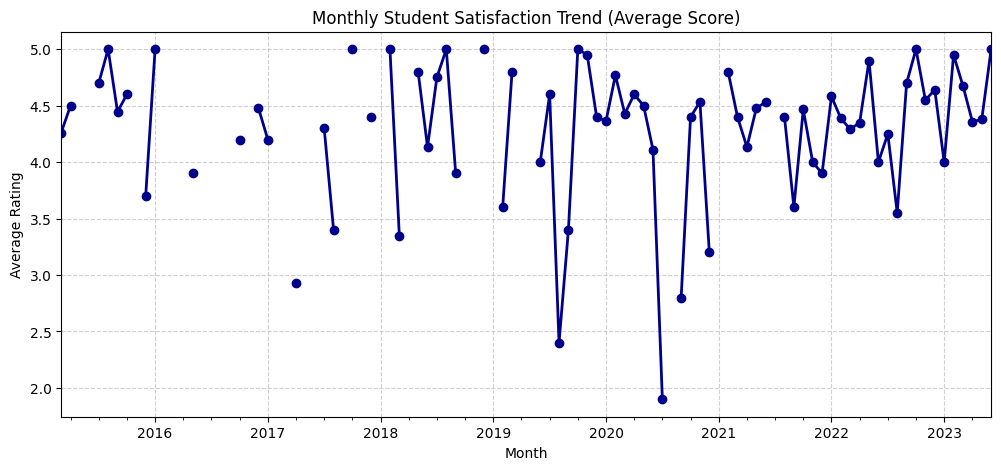

In [ ]:
# 1. Clean and Parse Dates
def clean_date(date_str):
    import re
    # Removes st, nd, rd, th (e.g., 1st June -> 1 June)
    return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', str(date_str))

df['date_cleaned'] = df['Date'].apply(clean_date)
df['date_parsed'] = pd.to_datetime(df['date_cleaned'], errors='coerce')

# 2. Resample by Month to see the trend
monthly_trend = df.set_index('date_parsed').resample('ME')['score'].mean()

# 3. Plot the Trend
plt.figure(figsize=(12, 5))
monthly_trend.plot(marker='o', color='darkblue', linewidth=2)
plt.title('Monthly Student Satisfaction Trend (Average Score)')
plt.ylabel('Average Rating')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-3452997017.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gap_data, x='Gap_from_Total', y='Facility', palette='RdYlGn')


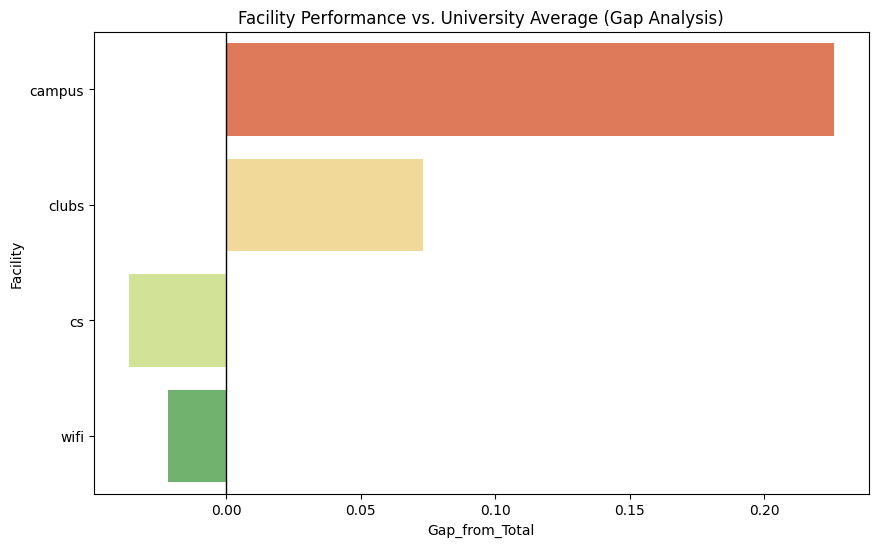

In [ ]:
# Calculate gaps
avg_total = df['score'].mean()
facilities = ['campus', 'clubs', 'cs', 'wifi']
facility_means = df[facilities].mean()

gap_data = pd.DataFrame({
    'Facility': facility_means.index,
    'Average': facility_means.values,
    'Gap_from_Total': facility_means.values - avg_total
})

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=gap_data, x='Gap_from_Total', y='Facility', palette='RdYlGn')
plt.axvline(0, color='black', lw=1)
plt.title('Facility Performance vs. University Average (Gap Analysis)')
plt.show()

In [ ]:
from IPython.display import HTML

# Define colors based on findings
top_color = "#28a745" # Green
low_color = "#dc3545" # Red

html_content = f"""
<div style="font-family: Arial, sans-serif; border: 1px solid #e0e0e0; border-radius: 8px; padding: 20px; background-color: #ffffff; width: 450px;">
    <h2 style="color: #2c3e50; border-bottom: 2px solid #3498db; padding-bottom: 10px;">📊 Executive Summary</h2>
    <table style="width: 100%; border-collapse: collapse; margin-top: 10px;">
        <tr style="border-bottom: 1px solid #eee;">
            <td style="padding: 10px; font-weight: bold;">Total Reviews</td>
            <td style="padding: 10px; text-align: right;">{len(df)}</td>
        </tr>
        <tr style="border-bottom: 1px solid #eee;">
            <td style="padding: 10px; font-weight: bold;">Avg. Satisfaction</td>
            <td style="padding: 10px; text-align: right; font-size: 1.2em; color: #3498db;">{df['score'].mean():.2f} / 5.0</td>
        </tr>
        <tr style="border-bottom: 1px solid #eee;">
            <td style="padding: 10px; font-weight: bold;">Top Facility</td>
            <td style="padding: 10px; text-align: right;"><span style="background-color: {top_color}; color: white; padding: 3px 8px; border-radius: 4px;">{facility_means.idxmax().upper()}</span></td>
        </tr>
        <tr style="border-bottom: 1px solid #eee;">
            <td style="padding: 10px; font-weight: bold;">Lowest Facility</td>
            <td style="padding: 10px; text-align: right;"><span style="background-color: {low_color}; color: white; padding: 3px 8px; border-radius: 4px;">{facility_means.idxmin().upper()}</span></td>
        </tr>
        <tr>
            <td style="padding: 10px; font-weight: bold;">Sentiment Mode</td>
            <td style="padding: 10px; text-align: right; font-style: italic;">{df['sentiment'].mode()[0]}</td>
        </tr>
    </table>
</div>
"""

display(HTML(html_content))

Total Reviews,557
Avg. Satisfaction,4.43 / 5.0
Top Facility,CAMPUS
Lowest Facility,CS
Sentiment Mode,Other
